In [9]:
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#import sklearn stuff
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
e = df.loc[df['species'] == 'setosa'].head()

In [14]:
len(e)

5

In [15]:
a = df.loc[df['species'] == 'virginica']

In [16]:
len(a)

50

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

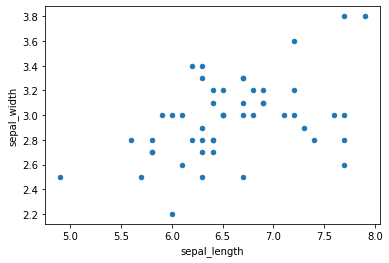

In [17]:
a.plot(x='sepal_length',y='sepal_width', kind='scatter')

In [18]:
e = df.loc[df['species'] == 'setosa']

In [19]:
l =  df.loc[df['species'] == 'versicolor']

In [20]:
vg_sl= a['sepal_length']
vg_sw= a['sepal_width']

s_sl= e['sepal_length']
s_sw= e['sepal_width']

ver_sl= l['sepal_length']
ver_sw= l['sepal_width']

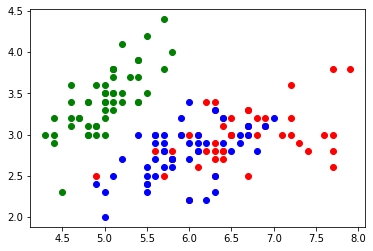

In [21]:
plt.scatter([vg_sl],[vg_sw],color='red', label='virginica')
plt.scatter([s_sl],[s_sw],color='green',label='setosa')
plt.scatter([ver_sl],[ver_sw],color='blue',label='versicolor')




In [22]:
vg_pl= a['petal_length']
vg_pw= a['petal_width']

s_pl= e['petal_length']
s_pw= e['petal_width']

ver_pl= l['petal_length']
ver_pw= l['petal_width']

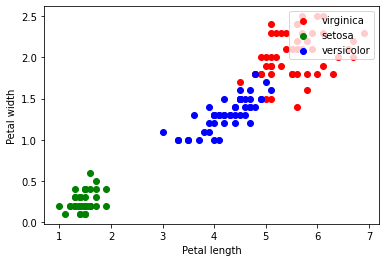

In [23]:
plt.scatter([vg_pl],[vg_pw],color='red', label='virginica')
plt.scatter([s_pl],[s_pw],color='green',label='setosa')
plt.scatter([ver_pl],[ver_pw],color='blue',label='versicolor')



plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper right')


In [59]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

In [60]:
y = df['species']

In [61]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [62]:
pd.get_dummies(y)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [63]:
from sklearn.preprocessing import LabelBinarizer 
from sklearn.model_selection import train_test_split

In [64]:
y = LabelBinarizer().fit_transform(y)

In [65]:
y.shape

(150, 3)

In [66]:
y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [67]:
X = df.loc[:, df.columns!='species']

In [68]:
X.shape

(150, 4)

In [69]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [70]:
X = X.to_numpy()

In [71]:
type(X)

numpy.ndarray

In [72]:
X[:5]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [74]:
X_train.shape

(135, 4)

In [75]:
X_test.shape

(15, 4)

In [76]:
kmn_mode = KNeighborsClassifier(n_neighbors=3)

In [77]:
kmn_mode.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
y_test

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [79]:
kmn_mode.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

NameError: name 'peux' is not defined